In this project sale prices of the houses predicted with two different approaches (regression / deep learning) and the success rate of the models calculated.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv("test.csv")
df2 = pd.read_csv("train.csv")

In [3]:
df=pd.concat([df1,df2],ignore_index=True)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,NaN
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,NaN
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,NaN
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,NaN
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,NaN


In [5]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2914,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,953.0,953.0,GasA,Ex,Y,SBrkr,953,694,0,1647,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2.0,460.0,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000.0
2915,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790.0,Rec,163.0,589.0,1542.0,GasA,TA,Y,SBrkr,2073,0,0,2073,1.0,0.0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2.0,500.0,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000.0
2916,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275.0,Unf,0.0,877.0,1152.0,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0.0,0.0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1.0,252.0,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500.0
2917,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49.0,Rec,1029.0,0.0,1078.0,GasA,Gd,Y,FuseA,1078,0,0,1078,1.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1.0,240.0,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125.0
2918,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830.0,LwQ,290.0,136.0,1256.0,GasA,Gd,Y,SBrkr,1256,0,0,1256,1.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1.0,276.0,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500.0


In [6]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
df2.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [9]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

## Exploratory Data Analysis

In [10]:
df["MSZoning"] = df.MSZoning.fillna(df["MSZoning"].mode)

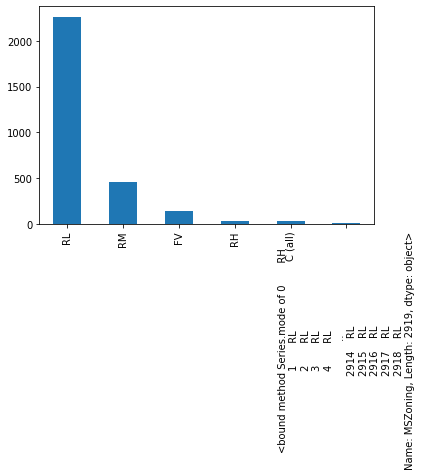

In [11]:
df.MSZoning.value_counts().plot.bar();

In [12]:
var = df.isnull().sum()
print(var.to_string())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<AxesSubplot: xlabel='LotFrontage'>

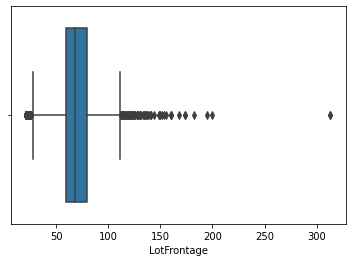

In [13]:
sns.boxplot(df.LotFrontage)

In [14]:
df.LotFrontage.fillna(df.LotFrontage.mean(),inplace=True)
df=df[df["LotFrontage"]<240]

<AxesSubplot: xlabel='LotArea'>

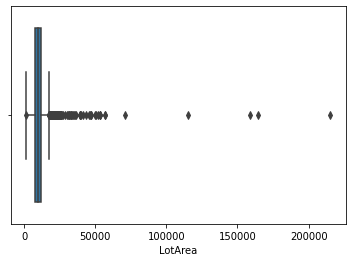

In [15]:
 sns.boxplot(df.LotArea)

In [16]:
df=df[df["LotArea"]<100000]

<AxesSubplot: >

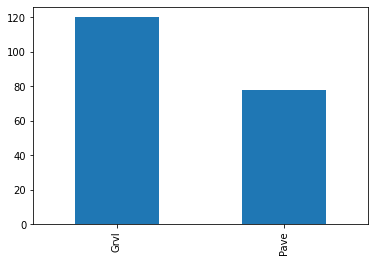

In [17]:
df.Alley.value_counts().plot.bar()

In [18]:
df.Alley.fillna("rare_var",inplace=True)

<AxesSubplot: >

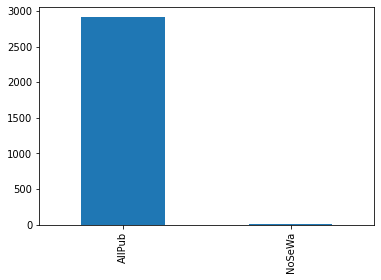

In [19]:
df.Utilities.value_counts().plot.bar()

In [20]:
df.Utilities.fillna("AllPub",inplace=True)

<AxesSubplot: >

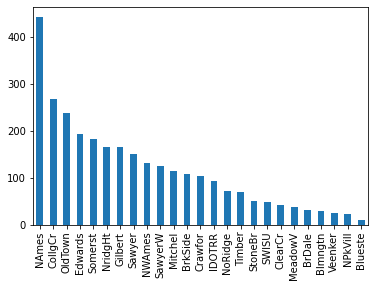

In [21]:
df.Neighborhood.value_counts().plot.bar()

In [22]:
df["YearBuilt"]=2023-df["YearBuilt"]

<AxesSubplot: xlabel='YearBuilt'>

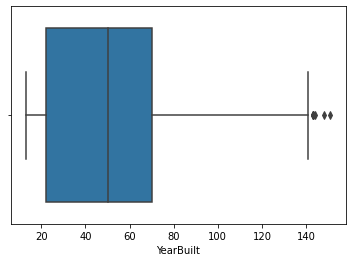

In [23]:
sns.boxplot(df.YearBuilt)

In [24]:
df=df[df["YearBuilt"]<140]

<AxesSubplot: xlabel='YearRemodAdd'>

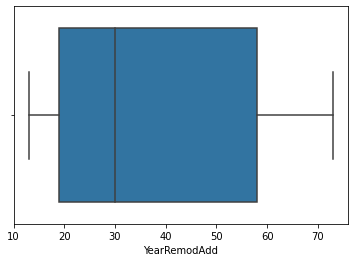

In [25]:
df["YearRemodAdd"]=2023-df["YearRemodAdd"]
sns.boxplot(df.YearRemodAdd)

<AxesSubplot: >

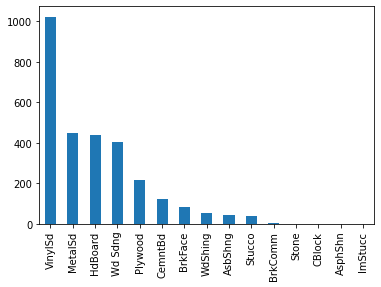

In [26]:
df.Exterior1st.value_counts().plot.bar()

In [27]:
df.Exterior1st.fillna("VinyslSd",inplace=True)  # mode -> VinslSd

<AxesSubplot: >

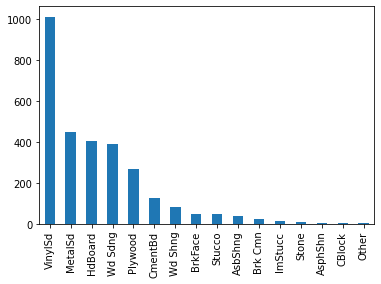

In [28]:
df.Exterior2nd.value_counts().plot.bar()

In [29]:
df.Exterior2nd.fillna("VinyslSd",inplace=True)  # mode -> VinslSd

<AxesSubplot: >

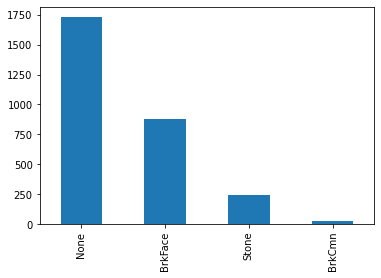

In [30]:
df.MasVnrType.value_counts().plot.bar()

In [31]:
df.MasVnrType.fillna("None",inplace=True)

<AxesSubplot: xlabel='MasVnrArea'>

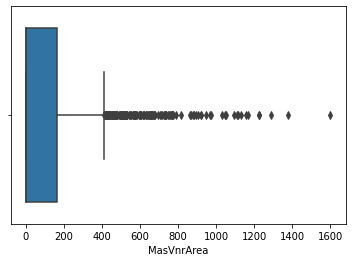

In [32]:
sns.boxplot(df.MasVnrArea)

In [33]:
df.MasVnrArea.fillna(df.MasVnrArea.mean(),inplace=True)
df=df[df["MasVnrArea"]<1200]

<AxesSubplot: >

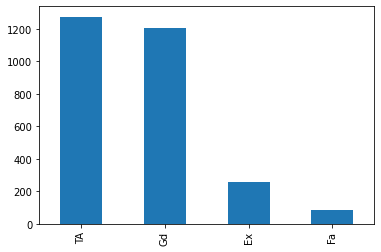

In [34]:
df.BsmtQual.value_counts().plot.bar()

In [35]:
df.BsmtQual.fillna("TA",inplace=True)

<AxesSubplot: >

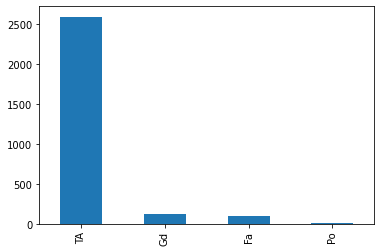

In [36]:
df.BsmtCond.value_counts().plot.bar()

In [37]:
df.BsmtCond.fillna("TA",inplace=True)

<AxesSubplot: >

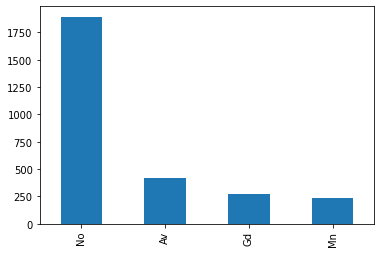

In [38]:
df.BsmtExposure.value_counts().plot.bar()

In [39]:
df.BsmtExposure.fillna("No",inplace=True)

<AxesSubplot: >

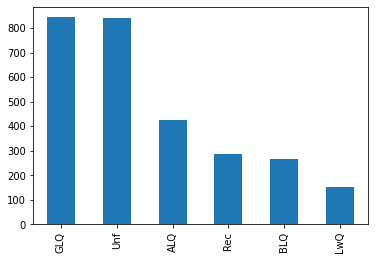

In [40]:
df.BsmtFinType1.value_counts().plot.bar()

In [41]:
df.BsmtFinType1.fillna("GLQ",inplace=True)

In [42]:
var = df.isnull().sum()
print(var.to_string())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          1
BsmtFinType2       79
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<AxesSubplot: xlabel='BsmtFinSF1'>

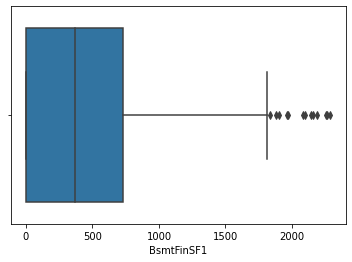

In [43]:
sns.boxplot(df.BsmtFinSF1)

In [44]:
df.BsmtFinSF1.fillna(df.BsmtFinSF1.mean(),inplace=True)
df=df[df["BsmtFinSF1"]<3000]

<AxesSubplot: >

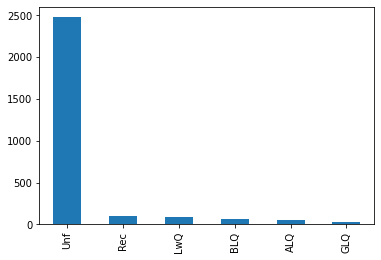

In [45]:
df.BsmtFinType2.value_counts().plot.bar()

In [46]:
df.BsmtFinType2.fillna("Unf",inplace=True)

<AxesSubplot: xlabel='BsmtFinSF2'>

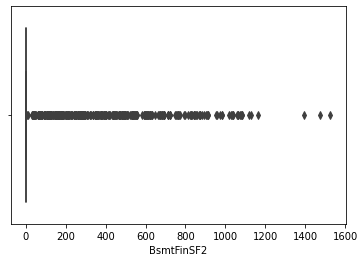

In [47]:
sns.boxplot(df.BsmtFinSF2)

In [48]:
df.BsmtFinSF2.fillna(df.BsmtFinSF2.mean(),inplace=True)
df=df[df["BsmtFinSF2"]<1200]

<AxesSubplot: xlabel='BsmtUnfSF'>

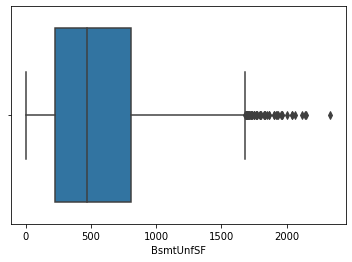

In [49]:
sns.boxplot(df.BsmtUnfSF)

In [50]:
df.BsmtUnfSF.fillna(df.BsmtUnfSF.mean(),inplace=True)
df=df[df["BsmtUnfSF"]<2300]

<AxesSubplot: xlabel='TotalBsmtSF'>

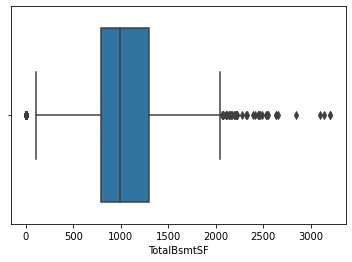

In [51]:
sns.boxplot(df.TotalBsmtSF)

In [52]:
df.TotalBsmtSF.fillna(df.TotalBsmtSF.mean(),inplace=True)
df=df[df["TotalBsmtSF"]<2500]

In [53]:
var = df.isnull().sum()
print(var.to_string())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<AxesSubplot: >

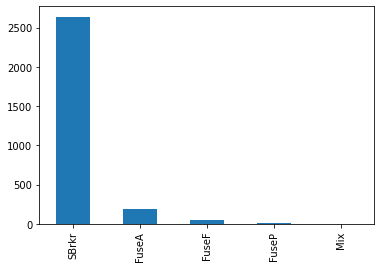

In [54]:
df.Electrical.value_counts().plot.bar()

In [55]:
df.Electrical.fillna("SBrkr",inplace=True)

<AxesSubplot: >

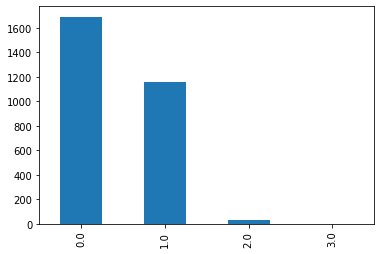

In [56]:
df.BsmtFullBath.value_counts().plot.bar()

In [57]:
df.BsmtFullBath.fillna(df.BsmtFullBath.mode,inplace=True)

<AxesSubplot: xlabel='1stFlrSF'>

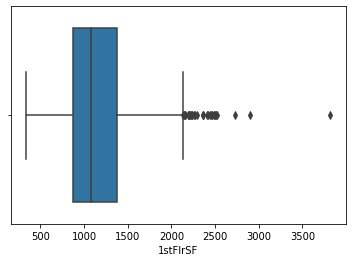

In [58]:
sns.boxplot(df["1stFlrSF"])

In [59]:
df=df[df["1stFlrSF"]<2600]

<AxesSubplot: xlabel='2ndFlrSF'>

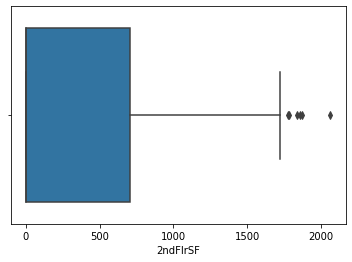

In [60]:
sns.boxplot(df["2ndFlrSF"])

In [61]:
df=df[df["2ndFlrSF"]<2000]

<AxesSubplot: xlabel='LowQualFinSF'>

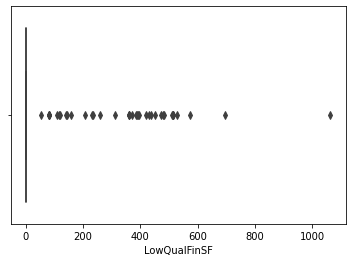

In [62]:
sns.boxplot(df["LowQualFinSF"])

In [63]:
df=df[df["LowQualFinSF"]<650]

In [64]:
df.BsmtFullBath

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2914    0.0
2915    1.0
2916    0.0
2917    1.0
2918    1.0
Name: BsmtFullBath, Length: 2878, dtype: object

<AxesSubplot: >

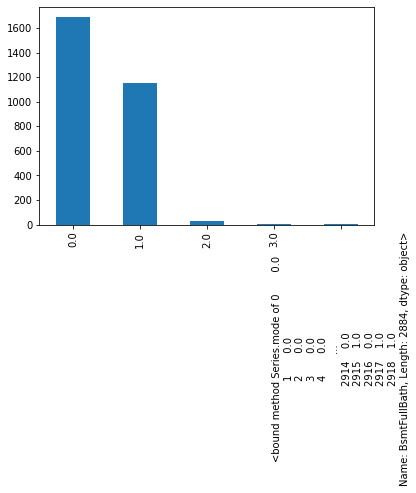

In [65]:
df.BsmtFullBath.fillna(df.BsmtFullBath.mode,inplace=True)
df["BsmtFullBath"].value_counts().plot.bar()

In [66]:
df.BsmtFullBath.mode()

0    0.0
dtype: object

In [67]:
df.BsmtHalfBath.fillna(df.BsmtHalfBath.mode,inplace=True)

<AxesSubplot: xlabel='FullBath'>

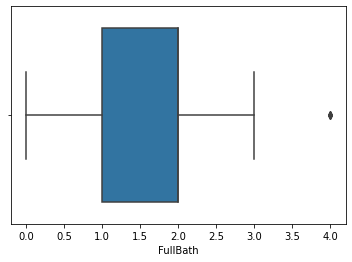

In [68]:
sns.boxplot(df["FullBath"])

In [69]:
df=df[df["FullBath"]<3.5]

<AxesSubplot: >

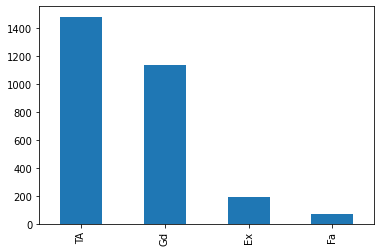

In [70]:
df.KitchenQual.fillna("TA",inplace=True)
df.KitchenQual.value_counts().plot.bar()  

<AxesSubplot: xlabel='TotRmsAbvGrd'>

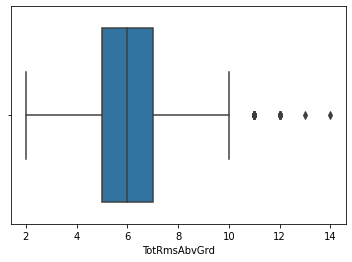

In [71]:
sns.boxplot(df["TotRmsAbvGrd"])

In [72]:
df=df[df["TotRmsAbvGrd"]<11]

<AxesSubplot: >

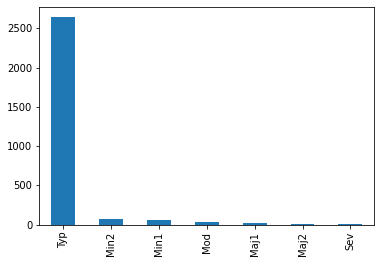

In [73]:
df.Functional.fillna("Typ",inplace=True)
df.Functional.value_counts().plot.bar() 

<AxesSubplot: >

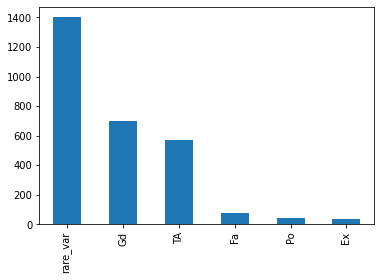

In [74]:
df.FireplaceQu.fillna("rare_var",inplace=True)
df.FireplaceQu.value_counts().plot.bar()

<AxesSubplot: >

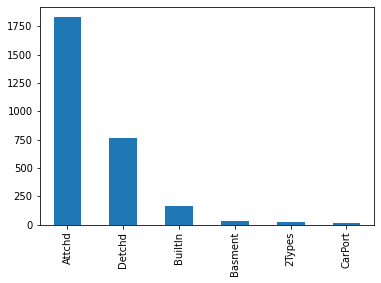

In [75]:
df.GarageType.fillna("Attchd",inplace=True)
df.GarageType.value_counts().plot.bar()

In [76]:
df.GarageYrBlt.fillna(df.GarageYrBlt.mean(),inplace=True)
df["GarageYrBlt"]=2023-df["GarageYrBlt"]

<AxesSubplot: xlabel='GarageYrBlt'>

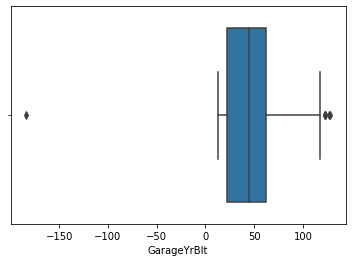

In [77]:
sns.boxplot(df.GarageYrBlt)

In [78]:
df=df[df["GarageYrBlt"]>0]

<AxesSubplot: >

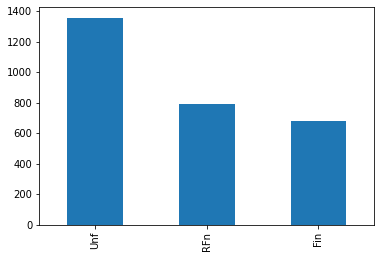

In [79]:
df.GarageFinish.fillna("Unf",inplace=True)
df.GarageFinish.value_counts().plot.bar()

<AxesSubplot: >

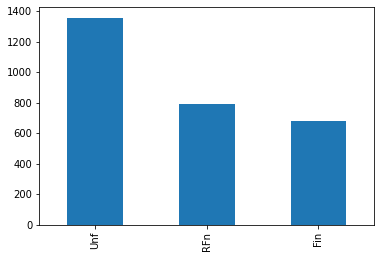

In [80]:
df.GarageFinish.value_counts().plot.bar()

<AxesSubplot: xlabel='GarageCars'>

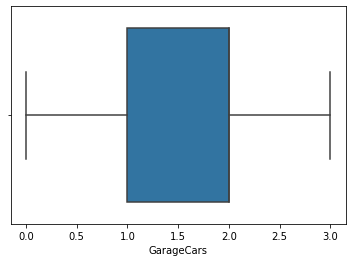

In [81]:
df=df[df["GarageCars"]<4]
df.GarageCars.fillna(df.GarageCars.mean(),inplace=True)
sns.boxplot(df["GarageCars"])

<AxesSubplot: xlabel='GarageArea'>

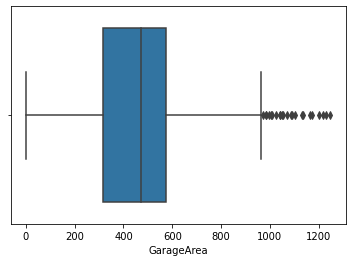

In [82]:
df=df[df["GarageArea"]<1300]
df.GarageArea.fillna(df.GarageCars.mean(),inplace=True)
sns.boxplot(df["GarageArea"])

<AxesSubplot: >

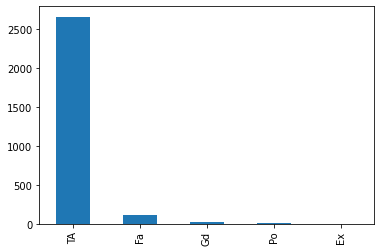

In [83]:
df.GarageQual.fillna("TA",inplace=True)
df.GarageQual.value_counts().plot.bar() 

<AxesSubplot: >

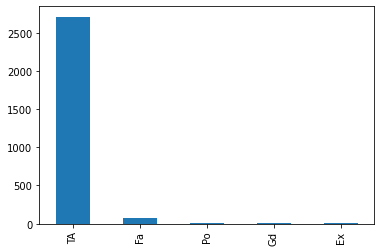

In [84]:
df.GarageCond.fillna("TA",inplace=True)
df.GarageCond.value_counts().plot.bar() 

<AxesSubplot: xlabel='WoodDeckSF'>

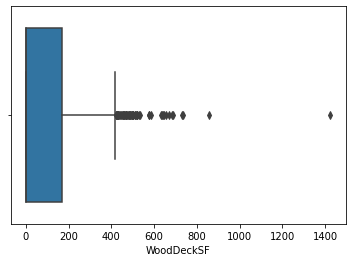

In [85]:
sns.boxplot(df["WoodDeckSF"])

In [86]:
df = df[df["WoodDeckSF"]<1000]

<AxesSubplot: xlabel='OpenPorchSF'>

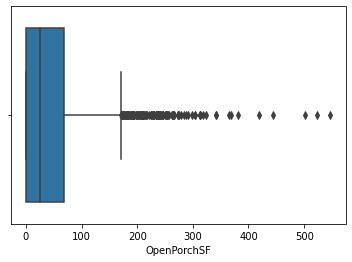

In [87]:
sns.boxplot(df["OpenPorchSF"])

In [88]:
df=df[df["OpenPorchSF"]<450]

<AxesSubplot: xlabel='EnclosedPorch'>

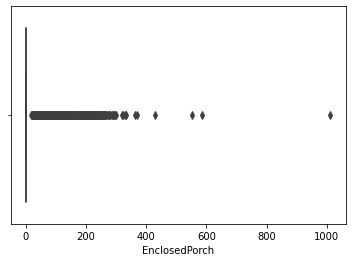

In [89]:
sns.boxplot(df["EnclosedPorch"])

In [90]:
df=df[df["EnclosedPorch"]<500]

<AxesSubplot: xlabel='ScreenPorch'>

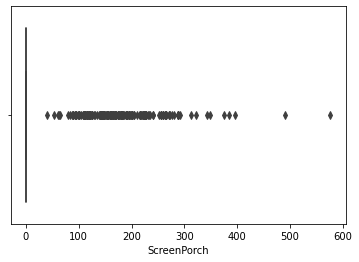

In [91]:
sns.boxplot(df["ScreenPorch"])

In [92]:
df=df[df["ScreenPorch"]<500]

<AxesSubplot: >

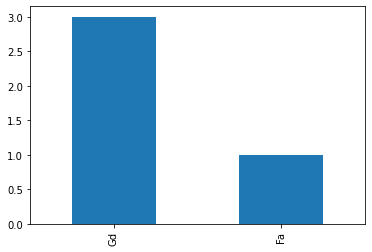

In [93]:
df.PoolQC.value_counts().plot.bar()

In [94]:
df.PoolQC.fillna("rare_var",inplace=True)

<AxesSubplot: >

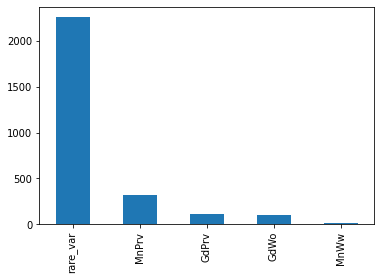

In [95]:
df.Fence.fillna("rare_var",inplace=True)
df.Fence.value_counts().plot.bar()

<AxesSubplot: >

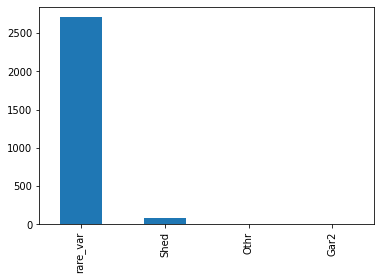

In [96]:
df.MiscFeature.fillna("rare_var",inplace=True)
df.MiscFeature.value_counts().plot.bar()

<AxesSubplot: xlabel='YrSold'>

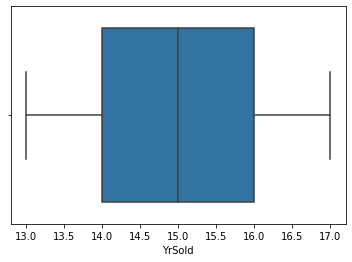

In [97]:
df["YrSold"]=2023-df["YrSold"]
sns.boxplot(df.YrSold)

<AxesSubplot: >

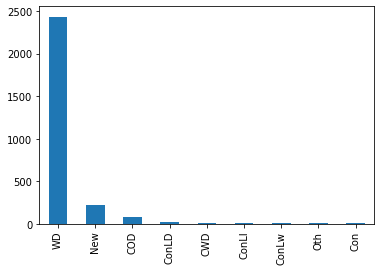

In [98]:
df.SaleType.fillna("WD",inplace=True)
df.SaleType.value_counts().plot.bar()

In [99]:
df.SalePrice

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2914    175000.0
2915    210000.0
2916    266500.0
2917    142125.0
2918    147500.0
Name: SalePrice, Length: 2804, dtype: float64

<AxesSubplot: xlabel='SalePrice'>

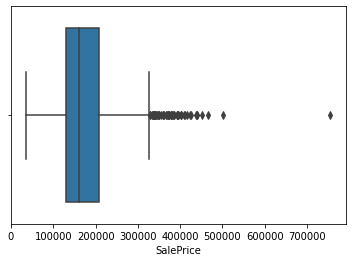

In [100]:
sns.boxplot(df.SalePrice)

In [101]:
df.shape

(2804, 81)

In [102]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,2804.000000,1399.000000
mean,1460.078103,56.945435,68.530849,9750.491441,6.047789,5.567404,51.438302,38.925107,95.927166,431.236664,47.944576,556.191052,1035.371697,1139.108060,318.467903,3.097718,1460.673680,1.544579,0.372325,2.827389,1.037447,6.329886,0.578103,45.116675,1.738231,464.218616,91.245720,45.533167,22.026391,2.708987,15.217190,1.116262,41.404779,6.198288,15.212197,176068.757684
std,844.730124,42.739170,19.794849,4901.169011,1.375023,1.103017,29.653044,20.942902,164.644066,428.557421,162.143250,434.553366,404.830985,359.026124,409.481755,34.213268,449.116394,0.535380,0.496614,0.788441,0.197259,1.411670,0.633215,24.481203,0.734420,205.919964,121.215166,61.849090,58.941235,25.694051,53.032939,27.163792,453.047393,2.712121,1.318756,70873.537111
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,13.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,13.000000,35311.000000
25%,726.750000,20.000000,60.000000,7391.500000,5.000000,5.000000,22.000000,19.000000,0.000000,0.000000,0.000000,220.000000,787.000000,868.000000,0.000000,0.000000,1114.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,22.000000,1.000000,315.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,14.000000,129500.000000
50%,1463.500000,50.000000,69.305795,9350.000000,6.000000,5.000000,50.000000,30.000000,0.000000,368.000000,0.000000,464.500000,981.500000,1071.500000,0.000000,0.000000,1428.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,45.034380,2.000000,473.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,15.000000,160000.000000
75%,2192.250000,70.000000,78.000000,11376.250000,7.000000,6.000000,69.000000,58.000000,153.250000,724.250000,0.000000,796.000000,1280.250000,1368.000000,684.000000,0.000000,1716.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,62.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,16.000000,208400.000000
max,2919.000000,190.000000,195.000000,70761.000000,10.000000,9.000000,138.000000,73.000000,1170.000000,2158.000000,1164.000000,2153.000000,2492.000000,2522.000000,1872.000000,528.000000,4316.000000,3.000000,2.000000,6.000000,3.000000,10.000000,4.000000,128.000000,3.000000,1248.000000,857.000000,444.000000,429.000000,508.000000,490.000000,800.000000,15500.000000,12.000000,17.000000,755000.000000


There are no empty values anymore. (except SalePrice)

In [103]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [104]:
train=df[1459:]

In [105]:
train.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2873,1415,50,RL,64.000000,13053,Pave,Pave,Reg,Bnk,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,6,7,100,23,Gambrel,CompShg,Wd Sdng,Wd Sdng,None,0.000000,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,833.0,833.0,GasA,Gd,Y,SBrkr,1053,795,0,1848,0.0,0.0,1,1,4,1,Gd,8,Typ,1,Gd,Detchd,101.0,Unf,2.0,370.0,TA,TA,N,0,0,0,0,220,0,rare_var,rare_var,rare_var,0,6,15,WD,Normal,207000.0
1693,235,60,RL,69.305795,7851,Pave,rare_var,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,21,21,Gable,CompShg,VinylSd,VinylSd,None,102.171468,Gd,TA,PConc,Gd,TA,No,GLQ,625.0,Unf,0.0,235.0,860.0,GasA,Ex,Y,SBrkr,860,1100,0,1960,1.0,0.0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,21.0,Fin,2.0,440.0,TA,TA,Y,288,48,0,0,0,0,rare_var,rare_var,rare_var,0,5,13,WD,Normal,216500.0
2133,675,20,RL,80.000000,9200,Pave,rare_var,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,58,58,Gable,CompShg,HdBoard,HdBoard,None,0.000000,TA,TA,CBlock,TA,TA,No,Rec,892.0,Unf,0.0,244.0,1136.0,GasA,TA,Y,SBrkr,1136,0,0,1136,1.0,0.0,1,0,3,1,TA,5,Typ,1,Gd,Attchd,58.0,RFn,1.0,384.0,TA,TA,Y,426,0,0,0,0,0,rare_var,rare_var,rare_var,0,7,15,WD,Normal,140000.0
2106,648,20,RL,85.000000,10452,Pave,rare_var,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,5,70,70,Hip,CompShg,Wd Sdng,Wd Sdng,Stone,216.000000,TA,TA,CBlock,TA,TA,Mn,Rec,500.0,Unf,0.0,594.0,1094.0,GasA,Ex,Y,SBrkr,1094,0,0,1094,0.0,0.0,1,0,3,1,TA,5,Typ,2,Gd,Attchd,70.0,RFn,2.0,495.0,TA,TA,Y,0,0,0,0,287,0,rare_var,rare_var,rare_var,0,6,15,WD,Normal,155000.0
2118,660,20,RL,75.000000,9937,Pave,rare_var,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,59,24,Hip,CompShg,MetalSd,MetalSd,None,0.000000,TA,Gd,PConc,TA,TA,No,BLQ,637.0,Unf,0.0,849.0,1486.0,GasA,Ex,Y,SBrkr,1486,0,0,1486,1.0,0.0,1,0,3,1,TA,7,Typ,0,rare_var,Detchd,55.0,Fin,2.0,480.0,TA,TA,Y,0,0,0,0,0,0,rare_var,MnPrv,rare_var,0,3,14,WD,Normal,167000.0


<AxesSubplot: >

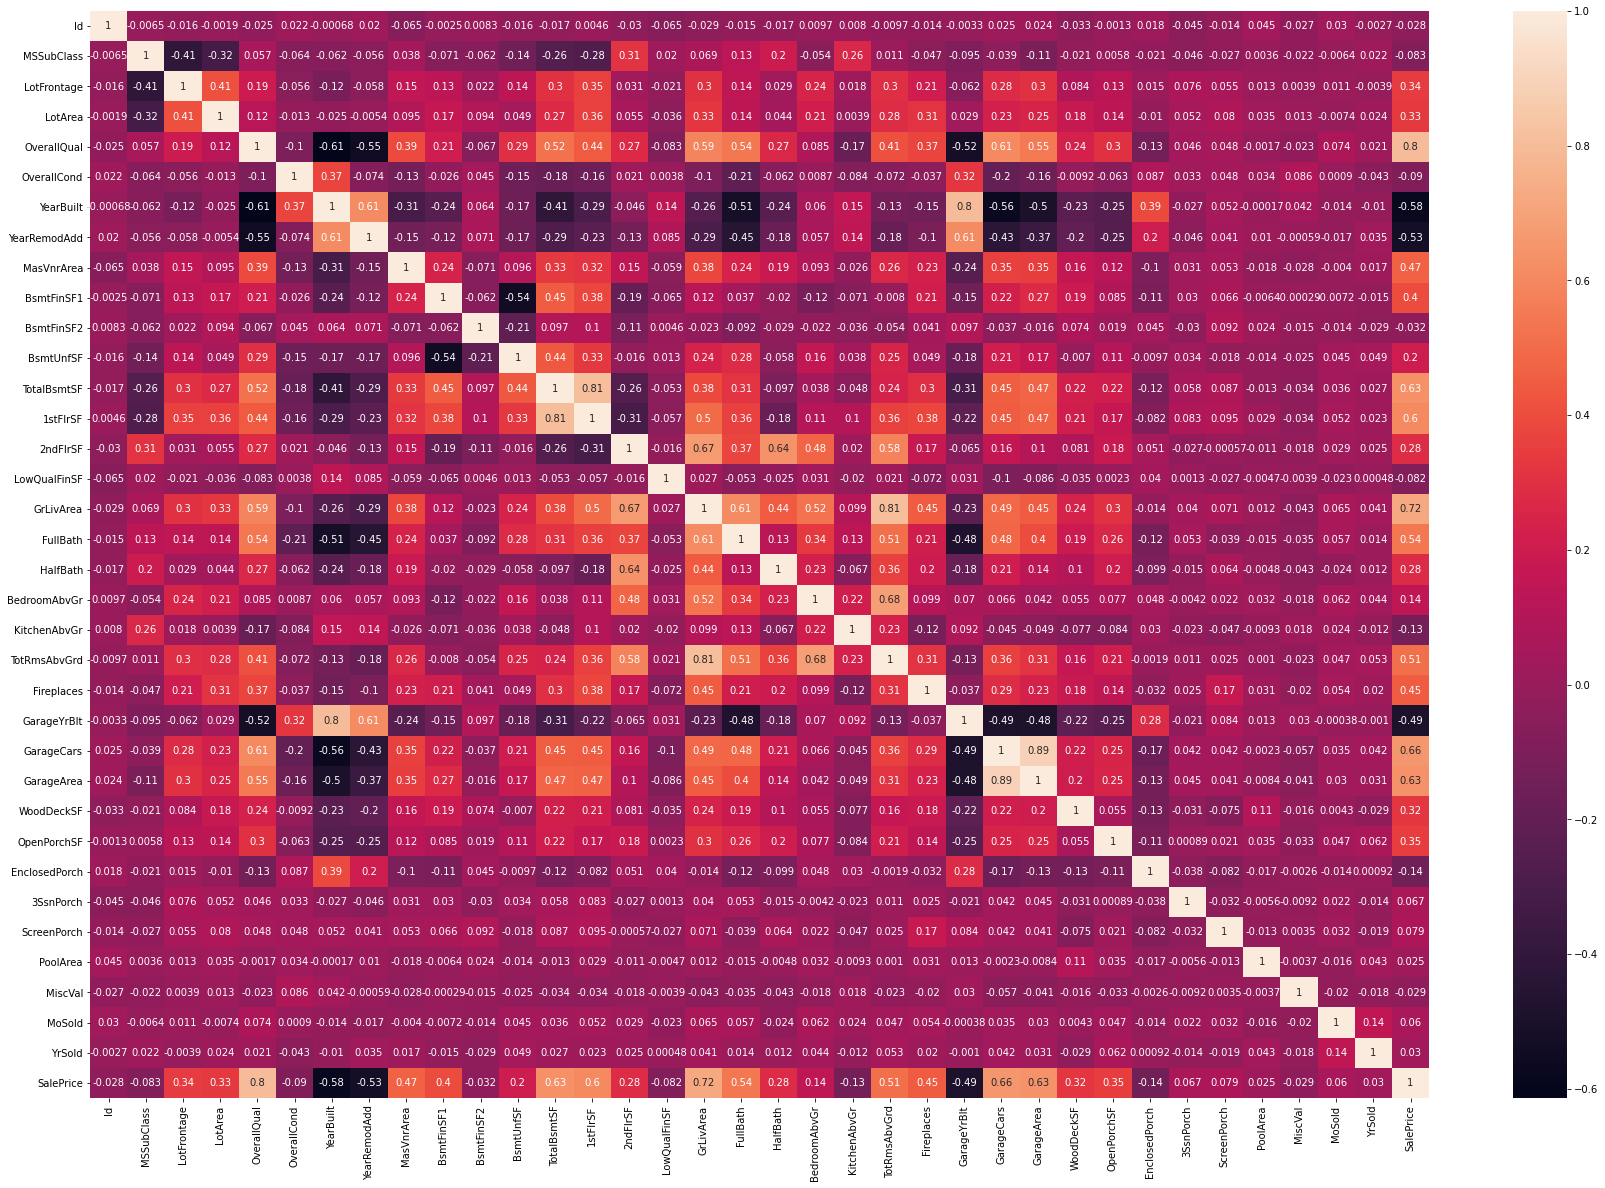

In [106]:
plt.figure(figsize=(30,20))
sns.heatmap(train.corr(),annot=True)

In [107]:
train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,-0.006460,-0.015890,-0.001876,-0.025132,0.022283,-0.000680,0.020430,-0.064970,-0.002468,0.008310,-0.015655,-0.016546,0.004580,-0.030146,-0.064640,-0.029433,-0.014990,-0.017464,0.009659,0.007954,-0.009663,-0.014490,-0.003338,0.025088,0.024235,-0.033123,-0.001258,0.017904,-0.045277,-0.014308,0.045422,-0.027284,0.029502,-0.002721,-0.027680
MSSubClass,-0.006460,1.000000,-0.407704,-0.317711,0.056696,-0.063734,-0.061619,-0.055687,0.037981,-0.070648,-0.062001,-0.142869,-0.257195,-0.278283,0.312043,0.019991,0.068790,0.134064,0.196687,-0.054016,0.257706,0.010550,-0.047155,-0.095393,-0.039440,-0.106007,-0.020804,0.005796,-0.021390,-0.046197,-0.027484,0.003629,-0.022246,-0.006449,0.021731,-0.082940
LotFrontage,-0.015890,-0.407704,1.000000,0.408043,0.194439,-0.056076,-0.118929,-0.058082,0.154588,0.132324,0.022082,0.136713,0.300565,0.352433,0.031261,-0.021165,0.301811,0.143249,0.029471,0.244357,0.017508,0.296251,0.206071,-0.062252,0.276003,0.304286,0.083998,0.128652,0.015381,0.075831,0.055231,0.012667,0.003863,0.011247,-0.003872,0.340204
LotArea,-0.001876,-0.317711,0.408043,1.000000,0.119226,-0.013165,-0.025270,-0.005410,0.095238,0.169348,0.093761,0.048641,0.271840,0.356806,0.054759,-0.036132,0.325354,0.140096,0.043569,0.214538,0.003923,0.282081,0.308669,0.029211,0.228458,0.246355,0.176778,0.139918,-0.010475,0.052381,0.080019,0.034587,0.013098,-0.007357,0.023838,0.334749
OverallQual,-0.025132,0.056696,0.194439,0.119226,1.000000,-0.102222,-0.613867,-0.550160,0.389294,0.208952,-0.067180,0.294105,0.520077,0.440466,0.274135,-0.083130,0.586530,0.540055,0.266779,0.085429,-0.174361,0.410058,0.369683,-0.521152,0.605501,0.546927,0.236574,0.303175,-0.132455,0.045518,0.048218,-0.001679,-0.023164,0.073987,0.021117,0.801010
OverallCond,0.022283,-0.063734,-0.056076,-0.013165,-0.102222,1.000000,0.373845,-0.073530,-0.129786,-0.026348,0.045040,-0.153960,-0.179502,-0.156223,0.020684,0.003760,-0.102792,-0.214449,-0.061904,0.008737,-0.083948,-0.071612,-0.036763,0.321203,-0.195208,-0.161719,-0.009162,-0.062943,0.086598,0.033040,0.047911,0.034476,0.085727,0.000897,-0.043231,-0.089602
YearBuilt,-0.000680,-0.061619,-0.118929,-0.025270,-0.613867,0.373845,1.000000,0.611927,-0.305071,-0.236227,0.063998,-0.165917,-0.409646,-0.294919,-0.046354,0.140875,-0.260403,-0.513446,-0.241676,0.059529,0.152780,-0.130662,-0.149482,0.802761,-0.564701,-0.500180,-0.231399,-0.250263,0.387705,-0.027065,0.052244,-0.000167,0.042247,-0.013858,-0.010248,-0.576094
YearRemodAdd,0.020430,-0.055687,-0.058082,-0.005410,-0.550160,-0.073530,0.611927,1.000000,-0.151245,-0.123018,0.071021,-0.165920,-0.285751,-0.231098,-0.131203,0.085311,-0.292654,-0.445843,-0.175833,0.056562,0.143673,-0.181545,-0.104313,0.613992,-0.425834,-0.365805,-0.204204,-0.253809,0.201083,-0.046070,0.040502,0.010360,-0.000590,-0.017496,0.035154,-0.526915
MasVnrArea,-0.064970,0.037981,0.154588,0.095238,0.389294,-0.129786,-0.305071,-0.151245,1.000000,0.241019,-0.070969,0.095800,0.334950,0.316076,0.148021,-0.058613,0.376608,0.243161,0.186640,0.093092,-0.025756,0.263504,0.225550,-0.235873,0.354945,0.346467,0.156988,0.117973,-0.100409,0.031203,0.053135,-0.018332,-0.027614,-0.004015,0.016732,0.467831
BsmtFinSF1,-0.002468,-0.070648,0.132324,0.169348,0.208952,-0.026348,-0.236227,-0.123018,0.241019,1.000000,-0.062275,-0.540754,0.450818,0.380376,-0.188567,-0.064661,0.119594,0.037383,-0.020384,-0.116621,-0.071103,-0.008041,0.213887,-0.145766,0.222572,0.272994,0.188769,0.084737,-0.114681,0.029576,0.065671,-0.006415,-0.000287,-0.007175,-0.015141,0.397619


In [108]:
abs(train.corr()['SalePrice']).sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.801010
GrLivArea        0.724259
GarageCars       0.658931
GarageArea       0.634396
TotalBsmtSF      0.632401
1stFlrSF         0.604261
YearBuilt        0.576094
FullBath         0.543926
YearRemodAdd     0.526915
TotRmsAbvGrd     0.512440
GarageYrBlt      0.488856
MasVnrArea       0.467831
Fireplaces       0.450410
BsmtFinSF1       0.397619
OpenPorchSF      0.347107
LotFrontage      0.340204
LotArea          0.334749
WoodDeckSF       0.323741
2ndFlrSF         0.284810
HalfBath         0.281112
BsmtUnfSF        0.200110
EnclosedPorch    0.144688
BedroomAbvGr     0.143493
KitchenAbvGr     0.133762
OverallCond      0.089602
MSSubClass       0.082940
LowQualFinSF     0.081626
ScreenPorch      0.078583
3SsnPorch        0.066890
MoSold           0.060267
BsmtFinSF2       0.032453
YrSold           0.029821
MiscVal          0.028597
Id               0.027680
PoolArea         0.024840
Name: SalePrice, dtype: float64

In [109]:
df=pd.get_dummies(df,drop_first=True)

In [110]:
df.shape

(2804, 256)

## 1- Regression

In [111]:
x,y=df[1459:].drop("SalePrice",axis=1),df[1459:][['SalePrice']]

In [112]:
x.shape,y.shape

((1345, 255), (1345, 1))

In [113]:
def regression_funct(x,y,predict_test):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
    
    regression_funct.predict1_df2_survived=GBR.predict(predict_test)
    
    
    return result.sort_values('R_Squared',ascending=False)

In [114]:
predict_test=df[:1459].drop('SalePrice',axis=1)

In [115]:
regression_funct(x,y,predict_test)

,R_Squared,RMSE,MAE
Ridge,0.906900,24895.717637,14955.652902
Lasso,0.899917,25812.501421,15818.991854
LinearRegression,0.897633,26105.369366,16096.073596
ElasticNet,0.871439,29255.404755,17545.773501
GradientBoostingRegressor,0.860918,30428.847563,16945.094319
KNeighborsRegressor,0.635331,49272.006547,30694.669888
ExtraTreeRegressor,0.630357,49606.899211,28502.550186


In [116]:
result=pd.DataFrame()
result["Id"]=df[:1459]["Id"]
result["SalePrice"]=regression_funct.predict1_df2_survived

In [118]:
result.sample(10)

,Id,SalePrice
652,2113,111084.028606
1061,2522,219190.580776
708,2169,189916.236060
230,1691,179228.879635
164,1625,131910.086269
521,1982,232618.411875
11,1472,91243.676110
945,2406,142544.903032
956,2417,128813.814009
724,2185,121824.566856


## 2- Deep learning

In [119]:
#pip install tensorflow
#pip install keras

In [120]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [121]:
x=scaler.fit_transform(x)

In [122]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254
0,0.000000,0.000000,0.490683,0.127770,0.555556,0.500,0.368,0.766667,0.232479,0.257353,0.000000,0.434278,0.583061,0.500229,0.000000,0.0,0.273983,0.666667,0.0,0.500000,0.5,0.625,0.333333,0.418182,0.666667,0.461538,0.000000,0.000000,0.000000,0.801181,0.0,0.0,0.00000,0.545455,0.50,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.000712,0.823529,0.018634,0.019363,0.777778,0.500,0.088,0.166667,0.389744,0.340861,0.000000,0.149094,0.396890,0.297570,0.403846,0.0,0.352838,0.666667,0.5,0.500000,0.5,0.625,0.000000,0.100000,0.666667,0.384615,0.156250,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.636364,0.25,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.001425,0.235294,0.422360,0.148932,0.666667,0.500,0.048,0.100000,0.000000,0.000000,0.000000,0.399443,0.351882,0.241174,0.459402,0.0,0.348066,0.666667,0.5,0.500000,0.5,0.625,0.000000,0.054545,0.666667,0.452724,0.000000,0.167464,0.000000,0.000000,0.0,0.0,0.00000,0.636364,1.00,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.002137,0.235294,0.279503,0.178258,1.000000,0.500,0.032,0.066667,0.881197,0.000000,0.000000,0.654900,0.576923,0.500688,0.811432,0.0,0.655701,1.000000,0.5,0.500000,0.5,1.000,0.333333,0.036364,1.000000,0.513622,0.260870,0.000000,0.112121,0.000000,0.0,0.0,0.00000,0.818182,1.00,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.002849,0.000000,0.242236,0.084940,0.444444,0.750,0.304,0.633333,0.000000,0.331933,0.000000,0.068741,0.319149,0.204493,0.000000,0.0,0.112004,0.333333,0.0,0.333333,0.5,0.250,0.000000,0.336364,0.333333,0.282051,0.266304,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.50,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,0.997151,0.235294,0.254658,0.095262,0.555556,0.500,0.088,0.166667,0.000000,0.000000,0.000000,0.442638,0.389935,0.283815,0.370726,0.0,0.329734,0.666667,0.5,0.500000,0.5,0.625,0.333333,0.100000,0.666667,0.368590,0.000000,0.095694,0.000000,0.000000,0.0,0.0,0.00000,0.636364,0.75,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,

In [123]:
x.shape,y.shape

((1345, 255), (1345, 1))

In [124]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [125]:
model=Sequential()
model.add(Dense(1345, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(850, activation='relu'))
model.add(Dense(700, activation='relu'))
model.add(Dense(550, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse')    # mse regression

In [126]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=150, epochs=450, verbose=1)

Epoch 1/450
8/8 [==============================] - 1s 81ms/step - loss: 35094237184.0000 - val_loss: 39237681152.0000
Epoch 2/450
8/8 [==============================] - 0s 52ms/step - loss: 29689759744.0000 - val_loss: 6434319360.0000
Epoch 3/450
8/8 [==============================] - 0s 50ms/step - loss: 7663719424.0000 - val_loss: 11325580288.0000
Epoch 4/450
8/8 [==============================] - 0s 52ms/step - loss: 5514336256.0000 - val_loss: 4164566784.0000
Epoch 5/450
8/8 [==============================] - 0s 50ms/step - loss: 3069806848.0000 - val_loss: 3134979584.0000
Epoch 6/450
8/8 [==============================] - 1s 68ms/step - loss: 1947850624.0000 - val_loss: 3209765120.0000
Epoch 7/450
8/8 [==============================] - 0s 52ms/step - loss: 1653577856.0000 - val_loss: 2707955712.0000
Epoch 8/450
8/8 [==============================] - 0s 52ms/step - loss: 1335465344.0000 - val_loss: 2140823296.0000
Epoch 9/450
8/8 [==============================] - 0s 56ms/step - lo

Epoch 72/450
8/8 [==============================] - 0s 45ms/step - loss: 103470032.0000 - val_loss: 672639360.0000
Epoch 73/450
8/8 [==============================] - 0s 47ms/step - loss: 93939408.0000 - val_loss: 702971392.0000
Epoch 74/450
8/8 [==============================] - 0s 47ms/step - loss: 95703696.0000 - val_loss: 664374976.0000
Epoch 75/450
8/8 [==============================] - 0s 46ms/step - loss: 88383568.0000 - val_loss: 679689152.0000
Epoch 76/450
8/8 [==============================] - 0s 46ms/step - loss: 99510840.0000 - val_loss: 692404160.0000
Epoch 77/450
8/8 [==============================] - 0s 51ms/step - loss: 94334120.0000 - val_loss: 694536640.0000
Epoch 78/450
8/8 [==============================] - 0s 50ms/step - loss: 91027072.0000 - val_loss: 671227072.0000
Epoch 79/450
8/8 [==============================] - 0s 49ms/step - loss: 90276096.0000 - val_loss: 678996096.0000
Epoch 80/450
8/8 [==============================] - 0s 49ms/step - loss: 90140464.0000 

8/8 [==============================] - 0s 48ms/step - loss: 20811558.0000 - val_loss: 634084928.0000
Epoch 144/450
8/8 [==============================] - 0s 48ms/step - loss: 16185251.0000 - val_loss: 649354624.0000
Epoch 145/450
8/8 [==============================] - 0s 50ms/step - loss: 17804596.0000 - val_loss: 639092800.0000
Epoch 146/450
8/8 [==============================] - 0s 49ms/step - loss: 15711124.0000 - val_loss: 644248832.0000
Epoch 147/450
8/8 [==============================] - 0s 48ms/step - loss: 15980689.0000 - val_loss: 634591936.0000
Epoch 148/450
8/8 [==============================] - 0s 48ms/step - loss: 12572863.0000 - val_loss: 644994624.0000
Epoch 149/450
8/8 [==============================] - 0s 47ms/step - loss: 11229189.0000 - val_loss: 677101504.0000
Epoch 150/450
8/8 [==============================] - 0s 50ms/step - loss: 23001692.0000 - val_loss: 636528512.0000
Epoch 151/450
8/8 [==============================] - 0s 49ms/step - loss: 17427560.0000 - val_

8/8 [==============================] - 0s 58ms/step - loss: 8875825.0000 - val_loss: 643509312.0000
Epoch 215/450
8/8 [==============================] - 0s 59ms/step - loss: 7642863.5000 - val_loss: 640538624.0000
Epoch 216/450
8/8 [==============================] - 1s 67ms/step - loss: 4186472.7500 - val_loss: 639212736.0000
Epoch 217/450
8/8 [==============================] - 0s 58ms/step - loss: 3635526.0000 - val_loss: 652181568.0000
Epoch 218/450
8/8 [==============================] - 0s 53ms/step - loss: 3666915.0000 - val_loss: 645108096.0000
Epoch 219/450
8/8 [==============================] - 1s 94ms/step - loss: 4588521.5000 - val_loss: 644615360.0000
Epoch 220/450
8/8 [==============================] - 1s 94ms/step - loss: 3138610.0000 - val_loss: 639359680.0000
Epoch 221/450
8/8 [==============================] - 1s 69ms/step - loss: 2564251.2500 - val_loss: 642930816.0000
Epoch 222/450
8/8 [==============================] - 0s 60ms/step - loss: 3127699.0000 - val_loss: 642

8/8 [==============================] - 0s 58ms/step - loss: 11124902.0000 - val_loss: 657779840.0000
Epoch 286/450
8/8 [==============================] - 1s 74ms/step - loss: 6161322.0000 - val_loss: 652722304.0000
Epoch 287/450
8/8 [==============================] - 1s 62ms/step - loss: 7245699.5000 - val_loss: 670302336.0000
Epoch 288/450
8/8 [==============================] - 0s 58ms/step - loss: 12482011.0000 - val_loss: 670484864.0000
Epoch 289/450
8/8 [==============================] - 0s 52ms/step - loss: 27077726.0000 - val_loss: 708273728.0000
Epoch 290/450
8/8 [==============================] - 0s 49ms/step - loss: 62237356.0000 - val_loss: 730249024.0000
Epoch 291/450
8/8 [==============================] - 0s 49ms/step - loss: 85508744.0000 - val_loss: 627495680.0000
Epoch 292/450
8/8 [==============================] - 0s 47ms/step - loss: 71162832.0000 - val_loss: 645182336.0000
Epoch 293/450
8/8 [==============================] - 0s 47ms/step - loss: 54909436.0000 - val_lo

Epoch 357/450
8/8 [==============================] - 0s 59ms/step - loss: 15642047.0000 - val_loss: 625472640.0000
Epoch 358/450
8/8 [==============================] - 0s 57ms/step - loss: 14845251.0000 - val_loss: 651410048.0000
Epoch 359/450
8/8 [==============================] - 0s 59ms/step - loss: 11203826.0000 - val_loss: 644183168.0000
Epoch 360/450
8/8 [==============================] - 0s 60ms/step - loss: 8037707.0000 - val_loss: 671988608.0000
Epoch 361/450
8/8 [==============================] - 0s 57ms/step - loss: 19786360.0000 - val_loss: 726791296.0000
Epoch 362/450
8/8 [==============================] - 0s 53ms/step - loss: 47777148.0000 - val_loss: 743985024.0000
Epoch 363/450
8/8 [==============================] - 0s 56ms/step - loss: 32948258.0000 - val_loss: 657594944.0000
Epoch 364/450
8/8 [==============================] - 0s 59ms/step - loss: 15918759.0000 - val_loss: 651365696.0000
Epoch 365/450
8/8 [==============================] - 0s 54ms/step - loss: 8715278

8/8 [==============================] - 0s 53ms/step - loss: 7185735.0000 - val_loss: 644683648.0000
Epoch 429/450
8/8 [==============================] - 0s 51ms/step - loss: 2756476.5000 - val_loss: 654569728.0000
Epoch 430/450
8/8 [==============================] - 0s 50ms/step - loss: 2654184.0000 - val_loss: 648306368.0000
Epoch 431/450
8/8 [==============================] - 0s 49ms/step - loss: 3320549.7500 - val_loss: 647781952.0000
Epoch 432/450
8/8 [==============================] - 0s 54ms/step - loss: 2989394.2500 - val_loss: 648600512.0000
Epoch 433/450
8/8 [==============================] - 0s 63ms/step - loss: 1598758.1250 - val_loss: 648831232.0000
Epoch 434/450
8/8 [==============================] - 0s 55ms/step - loss: 2223360.2500 - val_loss: 648024000.0000
Epoch 435/450
8/8 [==============================] - 0s 55ms/step - loss: 2204530.5000 - val_loss: 646146368.0000
Epoch 436/450
8/8 [==============================] - 0s 56ms/step - loss: 3031867.7500 - val_loss: 652

In [127]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1345)              344320    
                                                                 
 dense_1 (Dense)             (None, 1000)              1346000   
                                                                 
 dense_2 (Dense)             (None, 850)               850850    
                                                                 
 dense_3 (Dense)             (None, 700)               595700    
                                                                 
 dense_4 (Dense)             (None, 550)               385550    
                                                                 
 dense_5 (Dense)             (None, 400)               220400    
                                                                 
 dense_6 (Dense)             (None, 250)               1

<AxesSubplot: >

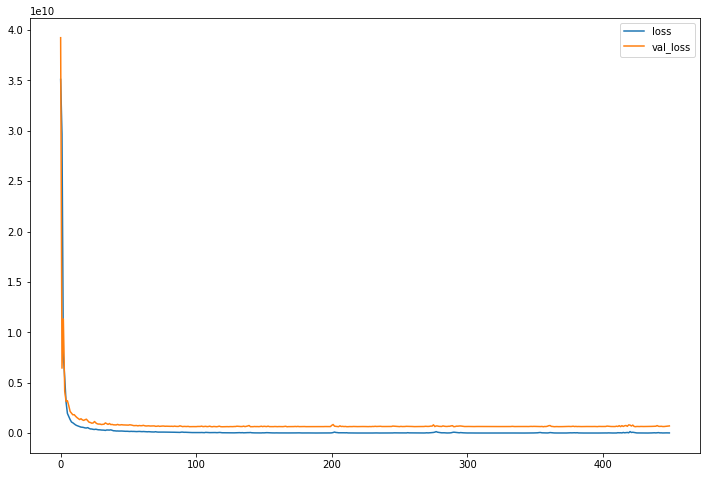

In [128]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [129]:
pred=model.predict(x_test)

9/9 [==============================] - 0s 8ms/step


In [130]:
(mean_squared_error(y_test,pred))**.5

26564.58088108912

In [131]:
r2_score(y_test,pred) 

0.8940003040440645

In [132]:
predict_test=df[:1459].drop('SalePrice',axis=1)
pred_x_test=model.predict(predict_test)

46/46 [==============================] - 0s 8ms/step


In [133]:
result=pd.DataFrame()
result["Id"]=df[:1459]["Id"]
result["SalePrice"]=pred_x_test

In [134]:
result.sample(10)

,Id,SalePrice
358,1819,5.513420e+08
889,2350,1.368325e+09
973,2434,9.519903e+08
1060,2521,1.074832e+09
1271,2732,9.814058e+08
1039,2500,5.870465e+08
123,1584,1.154171e+09
741,2202,9.056426e+08
288,1749,1.117940e+09
1392,2853,1.306584e+09
